# DAT210x - Programming with Python for DS

## Module4- Lab5

In [107]:
import pandas as pd
import numpy as np
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10, 10

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [27]:
import os
cwd = os.getcwd()

path = cwd + "/Datasets/ALOI/32/"
sample = os.listdir(path)

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [43]:
# .. your code here ..

# Uses the Image module (imageio)
import imageio

# Load the image up

img = []
for image in sample:
    imo = imageio.imread(path + image)
    img.append(imo.flatten())
    #img.append(imo)

# Is the image too big? Resample it down by an order of magnitude
#img = img[::2, ::2]

# Scale colors from (0-255) to (0-1), then reshape to 1D array per pixel, e.g. grayscale
# If you had color images and wanted to preserve all color channels, use .reshape(-1,3)
#X = (img / 255.0).reshape(-1)

Convert `samples` to a DataFrame named `df`:

In [52]:
df = pd.DataFrame(np.array(img))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 27648 entries, 0 to 27647
dtypes: uint8(27648)
memory usage: 1.9 MB


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [105]:
# .. your code here ..
from sklearn import manifold

n_neighbors = 6
n_components = 3
iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
iso.fit(df)
transformed_df = pd.DataFrame(iso.fit_transform(df))

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

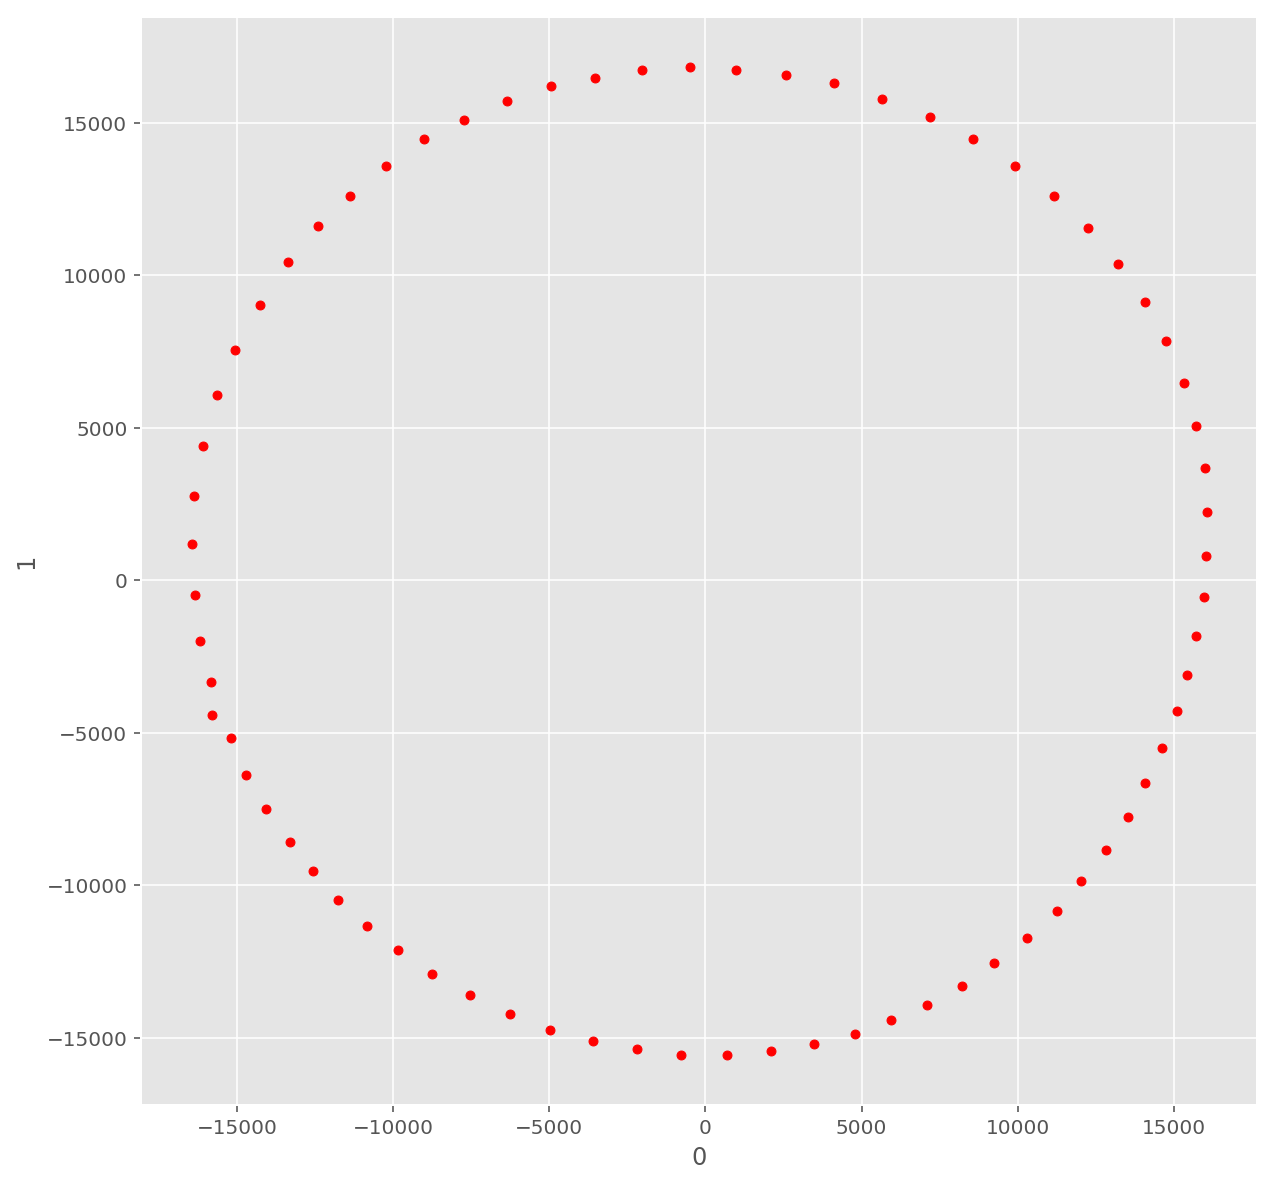

In [108]:
# .. your code here ..

plt.figure()
transformed_df.plot.scatter(x=0, y=1, marker="o", c='r');

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

<IPython.core.display.Javascript object>


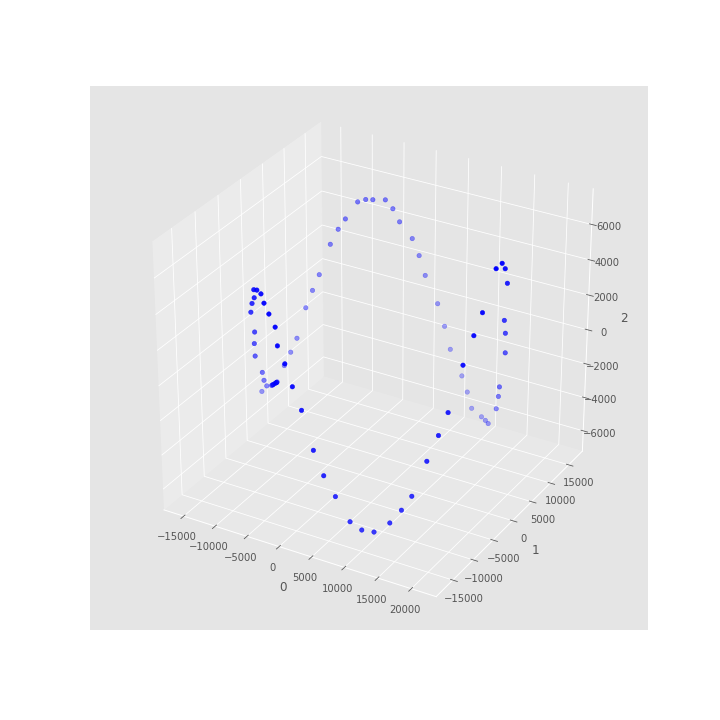

In [119]:
# .. your code here ..
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10, 10

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')

ax.scatter(transformed_df[0], transformed_df[1], transformed_df[2], c='b', marker='o')
#plt.show()

Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [111]:
# .. your code here ..
path = cwd + "/Datasets/ALOI/32i/"
sample = os.listdir(path)

import imageio

# Load the image up

for image in sample:
    imo = imageio.imread(path + image)
    img.append(imo.flatten())
    #img.append(imo)

Convert `samples` to a DataFrame named `df`:

In [112]:
# .. your code here ..
df = pd.DataFrame(np.array(img))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Columns: 27648 entries, 0 to 27647
dtypes: uint8(27648)
memory usage: 2.2 MB


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [113]:
# .. your code here ..

# .. your code here ..
from sklearn import manifold

n_neighbors = 6
n_components = 3
iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
iso.fit(df)
transformed_df = pd.DataFrame(iso.fit_transform(df))

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

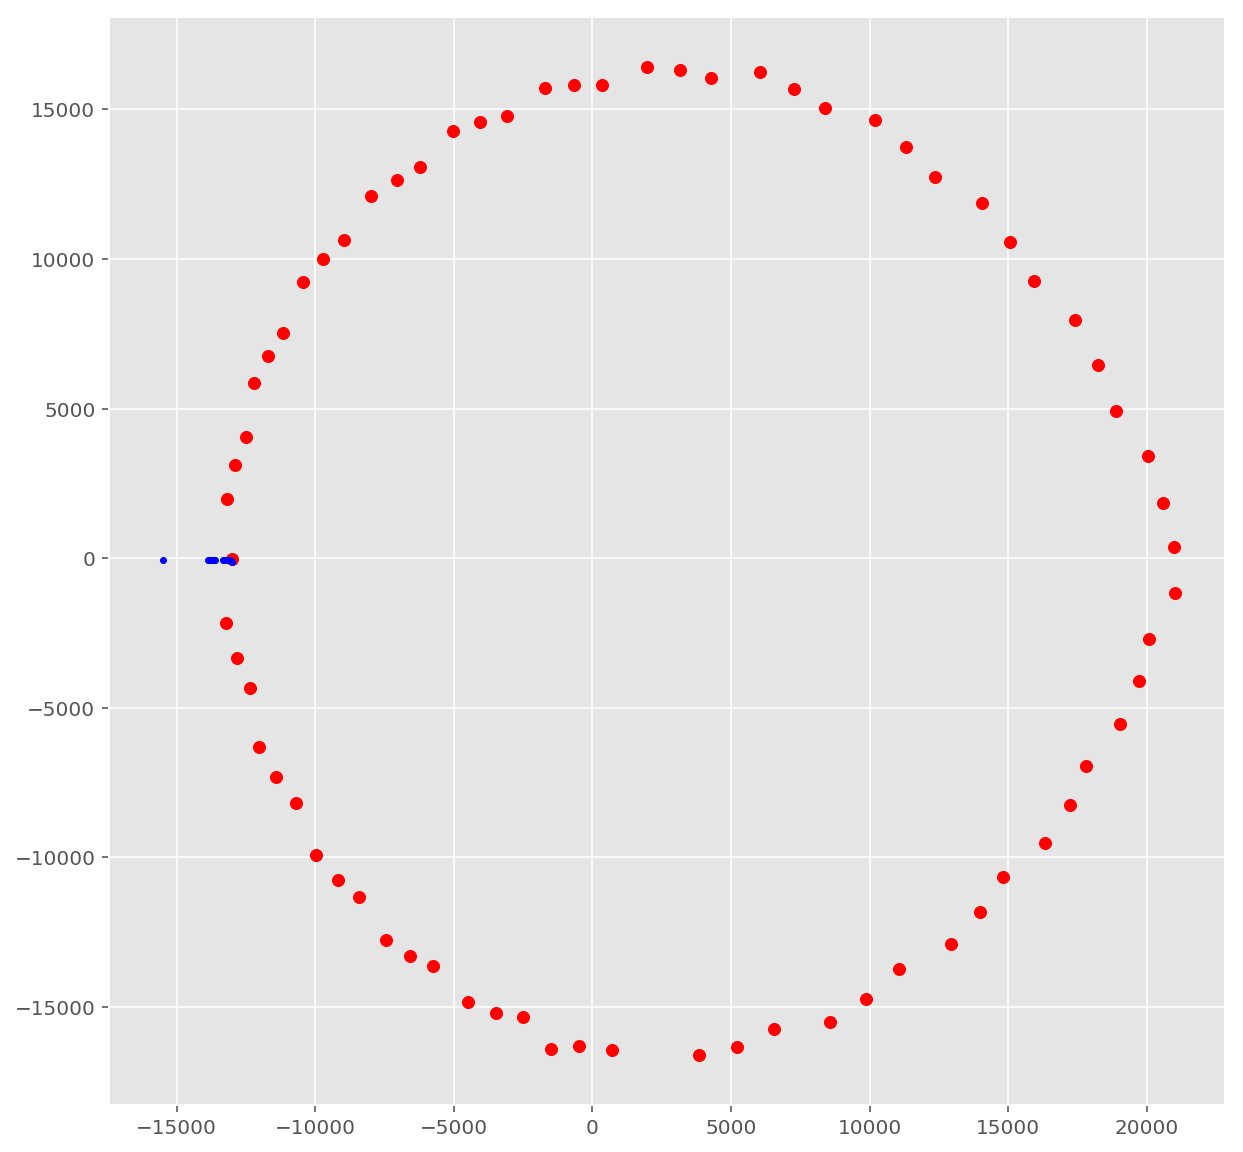

In [136]:
# .. your code here ..
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=transformed_df[0][:71], y=transformed_df[1][:71], marker="o", c='r')

ax1.scatter(x=transformed_df[0][72:], y=transformed_df[1][72:], marker=".", c='b')

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

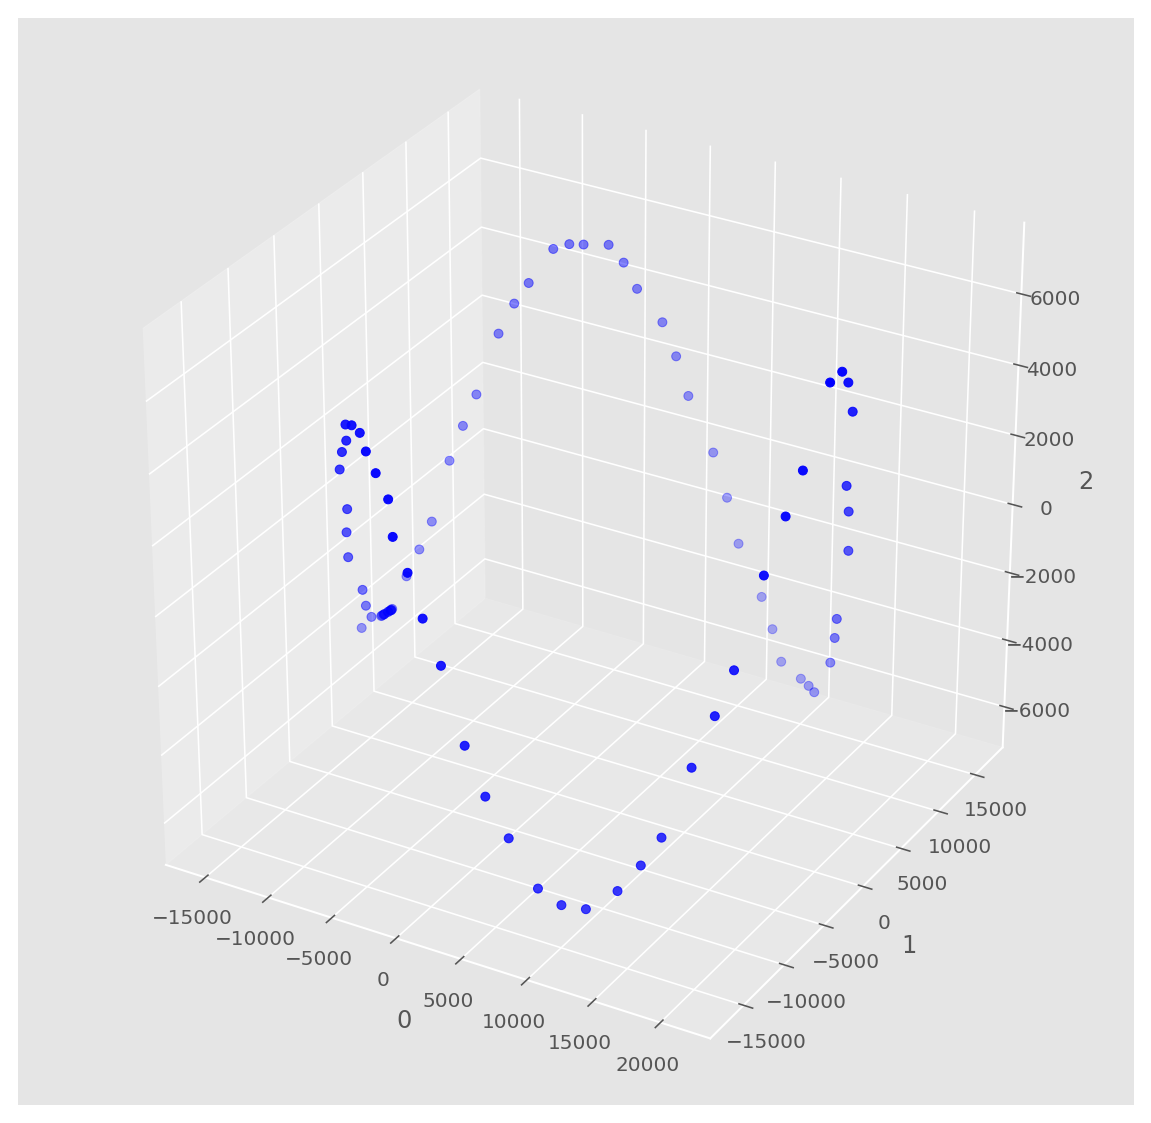

In [147]:
# .. your code here ..

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10, 10

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')

ax.scatter(transformed_df[0], transformed_df[1], transformed_df[2], c='b', marker='o')
#plt.show()